In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
def k_means_clustering(dataset, k):
    # Store the Species column separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)
    
    # Convert dataset to numpy array
    X = dataset.values
    
    # Randomly initialize centroids
    np.random.seed(42)  # For reproducibility
    centroids = X[np.random.choice(range(len(X)), size=k, replace=False)]
    
    # Initialize cluster labels and distances
    labels = np.zeros(len(X))
    distances = np.zeros((len(X), k))
    
    # Iterate until convergence
    while True:
        # Calculate distances to centroids
        for i in range(k):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        
        # Assign data points to clusters
        new_labels = np.argmin(distances, axis=1)
        
        # Check for convergence
        if np.array_equal(labels, new_labels):
            break
        
        # Update centroids
        for i in range(k):
            centroids[i] = np.mean(X[new_labels == i], axis=0)
        
        labels = new_labels
    
    return labels, species

In [4]:
def pca(dataset):
    # Store the Species column separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)
    
    # Standardize the dataset
    X = (dataset - dataset.mean()) / dataset.std()
    
    # Compute covariance matrix
    cov_matrix = np.cov(X.values.T)
    
    # Perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Project data onto first three eigenvectors
    projected_data = X.values.dot(eigenvectors[:, :3])
    
    return projected_data, eigenvalues, eigenvectors, species

In [5]:
# Load the Iris dataset
dataset = pd.read_csv('C:\\Users\\HP\\Desktop\\iit delhi fsm\\Iris Dataset.csv')

print(dataset)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

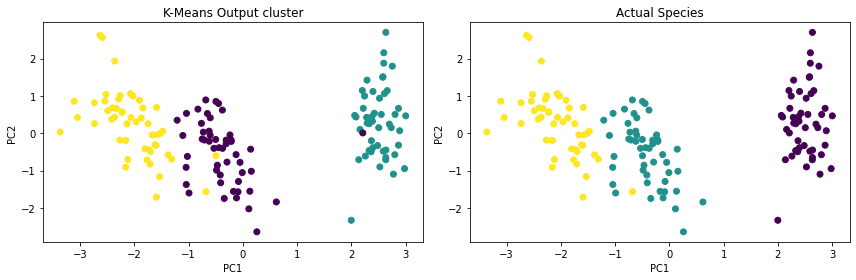

In [6]:
# Perform K-Means Clustering
k = 3  # Number of clusters
cluster_labels, species = k_means_clustering(dataset, k)


# Perform PCA
projected_data, eigenvalues, eigenvectors, species_pca = pca(dataset)

# Plot K-Means Clustering results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot cluster output
axes[0].scatter(projected_data[:, 0], projected_data[:, 1], c=cluster_labels)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('K-Means Output cluster')


# Plot actual species
species_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
species_labels = np.array([species_dict[s] for s in species])
axes[1].scatter(projected_data[:, 0], projected_data[:, 1], c=species_labels)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Actual Species')

plt.tight_layout()
plt.show()

In [7]:

print("Eigenvalues:")
for i in range(3):
    print(f"PC{i+1}: {eigenvalues[i]}")



Eigenvalues:
PC1: 3.735266500138632
PC2: 0.9217628443965988
PC3: 0.23413122102544112
